In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# Make sure that caffe is on the python path:
caffe_root = '../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

 Launch the python shell
 -----------------------

In the iPython shell in your Caffe repository, load the different libraries :


Define a network model

Let’s create first a very simple model with a single convolution composed of 3 convolutional neurons, with kernel of size 5x5 and stride of 1 :


simple network
<img src="images/simple_network.png">
This net will produce 3 output maps from an input map.

The output map for a convolution given receptive field size has a dimension given by the following equation :


output = (input - kernel_size) / stride + 1


Create a first file conv.prototxt describing the neuron network :


name: "convolution"
input: "data"
input_dim: 1
input_dim: 1
input_dim: 100
input_dim: 100
layer {
  name: "conv"
  type: "Convolution"
  bottom: "data"
  top: "conv"
  convolution_param {
    num_output: 3
    kernel_size: 5
    stride: 1
    weight_filler {
      type: "gaussian"
      std: 0.01
    }
    bias_filler {
      type: "constant"
      value: 0
    }
  }
}


with one layer, a convolution, from the Catalog of available layers

Load the net


In [2]:
net = caffe.Net('conv.prototxt', caffe.TEST)

The names of input layers of the net are given by print net.inputs.

In [3]:
print net.inputs

['data']


The net contains two ordered dictionaries

    net.blobs for input data and its propagation in the layers :

    net.blobs['data'] contains input data, an array of shape (1, 1, 100, 100) 
    net.blobs['conv'] contains computed data in layer ‘conv’ (1, 3, 96, 96)

    initialiazed with zeros.

    To print the infos,

In [4]:
 [(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (1, 1, 100, 100)), ('conv', (1, 3, 96, 96))]

net.params a vector of blobs for weight and bias parameters

net.params['conv'][0] contains the weight parameters, an array of shape (3, 1, 5, 5) net.params['conv'][1] contains the bias parameters, an array of shape (3,)

initialiazed with ‘weight_filler’ and ‘bias_filler’ algorithms.

To print the infos :

In [5]:
 [(k, v[0].data.shape, v[1].data.shape) for k, v in net.params.items()]

[('conv', (3, 1, 5, 5), (3,))]

Blobs are memory abstraction objects (with execution depending on the mode), and data is contained in the field data as an array :

In [6]:
print net.blobs['conv'].data.shape

(1, 3, 96, 96)


To draw the network, a simle python command :

In [7]:
%run ../python/draw_net.py /home/ali/git/caffe/examples/conv.prototxt my_net.png


Drawing net to my_net.png


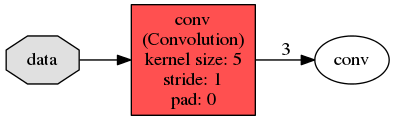

In [8]:
from IPython.display import Image
from IPython.display import display
display (Image('my_net.png'))


Compute the net output on an image as input

Let’s load a gray image of size 1x360x480 (channel x height x width) into the previous net :

Gray cat

We need to reshape the data blob (1, 1, 100, 100) to the new size (1, 1, 360, 480) to fit the image :

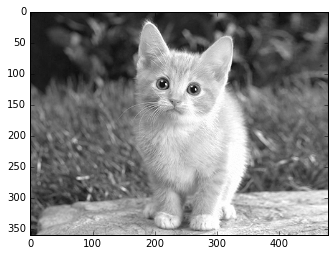

In [9]:
IMAGE_FILE = 'images/cat_gray.jpg'
input_image = caffe.io.load_image(IMAGE_FILE)
%matplotlib inline
plt.imshow(input_image)

In [10]:
import Image

im = np.array(Image.open('images/cat_gray.jpg'))
im_input = im[np.newaxis, np.newaxis, :, :]
net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input

Let’s compute the blobs given this input

In [11]:
net.forward()


{'conv': array([[[[ 0.34817484,  0.41027504,  0.20904401, ...,  0.74670231,
            0.75402164,  0.98378962],
          [ 0.24743864,  0.35323229,  0.26290619, ...,  0.87386566,
            0.82398188,  0.93434209],
          [ 0.25423867,  0.29808408,  0.2523751 , ...,  0.82616019,
            0.91159248,  1.07081389],
          ..., 
          [ 0.48195004,  0.36952889,  0.53944957, ...,  0.26091671,
            1.04394865,  2.69910812],
          [ 0.54389817,  0.509866  ,  0.64406353, ...,  0.43723965,
            0.70883918,  1.71184325],
          [ 0.78313452,  0.83525568,  0.67195249, ...,  2.27120996,
            1.53877044,  1.86886072]],
 
         [[ 0.70632005,  0.55720198,  0.55999583, ...,  1.02132368,
            1.03369617,  1.14927959],
          [ 0.62712717,  0.58100367,  0.63543195, ...,  1.10538316,
            1.19613838,  1.2529341 ],
          [ 0.5902034 ,  0.51536572,  0.59892392, ...,  1.26755846,
            1.30553865,  1.29252529],
          ..., 
   

Now net.blobs['conv'] is filled with data, and the 3 pictures inside each of the 3 neurons (net.blobs['conv'].data[0,i]) can be plotted easily.

To save the net parameters net.params, just call :

In [12]:
net.save('mymodel.caffemodel')

# Load pretrained parameters to classify an image

In the previous net, weight and bias params have been initialiazed randomly.

It is possible to load trained parameters and in this case, the result of the net will produce a classification.

Many trained models can be downloaded from the community in the Caffe Model Zoo, such as car classification, flower classification, digit classification…

Model informations are written in Github Gist format. The parameters are saved in a .caffemodel file specified in the gist. To download the model :

./scripts/download_model_from_gist.sh <gist_id>


./scripts/download_model_binary.py <dirname>



where is the gist directory (by default the gist is saved in the *models* directory).

Let’s download the CaffeNet model and the labels corresponding to the classes :

./scripts/download_model_binary.py models/bvlc_reference_caffenet
./data/ilsvrc12/get_ilsvrc_aux.sh


In [14]:
#have a look at the model
%run ../python/draw_net.py ../models/bvlc_reference_caffenet/deploy.prototxt caffenet.png

Drawing net to caffenet.png


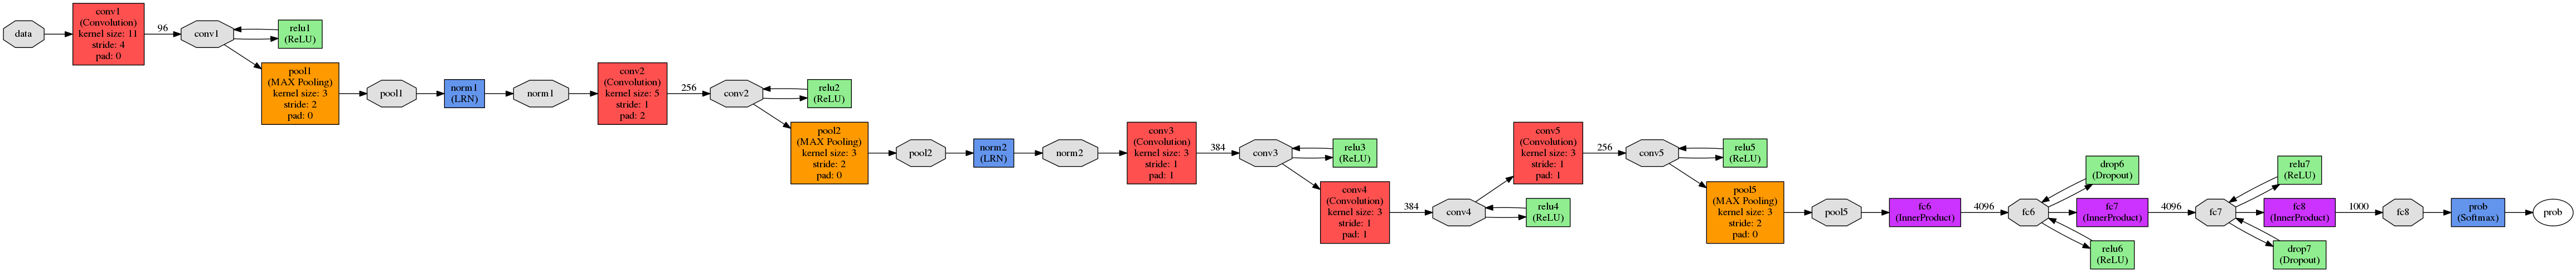

In [15]:
from IPython.display import Image
from IPython.display import display
display (Image('caffenet.png'))

This model has been trained on processed images, so you need to preprocess the image with a preprocessor, before saving it in the blob.

In [18]:
#load the model
net = caffe.Net('../models/bvlc_reference_caffenet/deploy.prototxt',
                '../models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel',
                caffe.TEST)

# load input and configure preprocessing
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_mean('data', np.load('../python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1))
transformer.set_transpose('data', (2,0,1))
transformer.set_channel_swap('data', (2,1,0))
transformer.set_raw_scale('data', 255.0)

#note we can change the batch size on-the-fly
#since we classify only one image, we change batch size from 10 to 1
net.blobs['data'].reshape(1,3,227,227)

#load the image in the data layer
im = caffe.io.load_image('images/cat.jpg')
net.blobs['data'].data[...] = transformer.preprocess('data', im)

#compute
out = net.forward()

# other possibility : out = net.forward_all(data=np.asarray([transformer.preprocess('data', im)]))

#predicted predicted class
print out['prob'].argmax()

#print predicted labels
labels = np.loadtxt("../data/ilsvrc12/synset_words.txt", str, delimiter='\t')
top_k = net.blobs['prob'].data[0].flatten().argsort()[-1:-6:-1]
print labels[top_k]

281
['n02123045 tabby, tabby cat' 'n02123159 tiger cat'
 'n02124075 Egyptian cat' 'n02119022 red fox, Vulpes vulpes'
 'n02127052 lynx, catamount']


# Learn : solve the params on training data

It is now time to create your own model, and training the parameters on training data.

To train a network, you need

    its model definition, as seen previously

    a second protobuf file, the solver file, describing the parameters for the stochastic gradient.

For example, the CaffeNet solver :



net: "models/bvlc_reference_caffenet/train_val.prototxt"

test_iter: 1000

test_interval: 1000

base_lr: 0.01

lr_policy: "step"

gamma: 0.1

stepsize: 100000

display: 20

max_iter: 450000

momentum: 0.9

weight_decay: 0.0005

snapshot: 10000

snapshot_prefix: "models/bvlc_reference_caffenet/caffenet_train"

solver_mode: GPU

In [19]:
[(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (1, 3, 227, 227)),
 ('conv1', (1, 96, 55, 55)),
 ('pool1', (1, 96, 27, 27)),
 ('norm1', (1, 96, 27, 27)),
 ('conv2', (1, 256, 27, 27)),
 ('pool2', (1, 256, 13, 13)),
 ('norm2', (1, 256, 13, 13)),
 ('conv3', (1, 384, 13, 13)),
 ('conv4', (1, 384, 13, 13)),
 ('conv5', (1, 256, 13, 13)),
 ('pool5', (1, 256, 6, 6)),
 ('fc6', (1, 4096)),
 ('fc7', (1, 4096)),
 ('fc8', (1, 1000)),
 ('prob', (1, 1000))]

In [22]:
[(k, v[0].data.shape, v[1].data.shape) for k, v in net.params.items()]

[('conv1', (96, 3, 11, 11), (96,)),
 ('conv2', (256, 48, 5, 5), (256,)),
 ('conv3', (384, 256, 3, 3), (384,)),
 ('conv4', (384, 192, 3, 3), (384,)),
 ('conv5', (256, 192, 3, 3), (256,)),
 ('fc6', (4096, 9216), (4096,)),
 ('fc7', (4096, 4096), (4096,)),
 ('fc8', (1000, 4096), (1000,))]

In [23]:
print net.params.items()


[('conv1', <caffe._caffe.BlobVec object at 0x7f6c873a5b40>), ('conv2', <caffe._caffe.BlobVec object at 0x7f6c87396980>), ('conv3', <caffe._caffe.BlobVec object at 0x7f6cde321fa0>), ('conv4', <caffe._caffe.BlobVec object at 0x7f6cde321d00>), ('conv5', <caffe._caffe.BlobVec object at 0x7f6cde321ec0>), ('fc6', <caffe._caffe.BlobVec object at 0x7f6cde321d70>), ('fc7', <caffe._caffe.BlobVec object at 0x7f6cde321e50>), ('fc8', <caffe._caffe.BlobVec object at 0x7f6cde321ad0>)]


In [24]:
print net.params

OrderedDict([('conv1', <caffe._caffe.BlobVec object at 0x7f6c873a5b40>), ('conv2', <caffe._caffe.BlobVec object at 0x7f6c87396980>), ('conv3', <caffe._caffe.BlobVec object at 0x7f6cde321fa0>), ('conv4', <caffe._caffe.BlobVec object at 0x7f6cde321d00>), ('conv5', <caffe._caffe.BlobVec object at 0x7f6cde321ec0>), ('fc6', <caffe._caffe.BlobVec object at 0x7f6cde321d70>), ('fc7', <caffe._caffe.BlobVec object at 0x7f6cde321e50>), ('fc8', <caffe._caffe.BlobVec object at 0x7f6cde321ad0>)])


In [25]:
print net.blobs


OrderedDict([('data', <caffe._caffe.Blob object at 0x7f6cde3a8230>), ('conv1', <caffe._caffe.Blob object at 0x7f6cde3a8938>), ('pool1', <caffe._caffe.Blob object at 0x7f6cde3a85f0>), ('norm1', <caffe._caffe.Blob object at 0x7f6cde3a82a8>), ('conv2', <caffe._caffe.Blob object at 0x7f6cde3a8b90>), ('pool2', <caffe._caffe.Blob object at 0x7f6cde3a89b0>), ('norm2', <caffe._caffe.Blob object at 0x7f6cde3a8488>), ('conv3', <caffe._caffe.Blob object at 0x7f6cde3a8410>), ('conv4', <caffe._caffe.Blob object at 0x7f6cde3a8a28>), ('conv5', <caffe._caffe.Blob object at 0x7f6cde3a8668>), ('pool5', <caffe._caffe.Blob object at 0x7f6cde3a8c80>), ('fc6', <caffe._caffe.Blob object at 0x7f6cde3a81b8>), ('fc7', <caffe._caffe.Blob object at 0x7f6cde3a8500>), ('fc8', <caffe._caffe.Blob object at 0x7f6cde3a88c0>), ('prob', <caffe._caffe.Blob object at 0x7f6cde3a8b18>)])


In [26]:
print net.params['conv1'][0]

In [27]:
print net.params['conv1'][0].data.shape

(96, 3, 11, 11)


In [28]:
print net.params['conv1'][1].data.shape

(96,)


In [30]:
print net.blobs['conv1'].data.shape

(1, 96, 55, 55)
